In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ecom = pd.read_csv('../data/Ecommerce.csv',encoding='unicode-escape')

In [3]:
ecom.drop('Unnamed: 8',axis=1,inplace=True)
ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [4]:
ecom.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
ecom[(ecom['Description'].isna()) & (ecom['CustomerID'].notna())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [8]:
inv_with_blank_cid = list(ecom[ecom['CustomerID'].isna()]['InvoiceNo'].unique())
ecom[ecom['InvoiceNo'] == '536547']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1972,536547,37509,NaN,1,29-Nov-16,0.0,NaN,United Kingdom


In [120]:
# Check if there is any null in Customer Ids. Try to pull Customer Ids from the invoice number
inv_with_blank_cid = list(ecom[ecom['CustomerID'].isna()]['InvoiceNo'].unique())
# ecom[ecom['InvoiceNo'] == inv_with_blank_cid[1]].isnull().sum()[6]
tot = 0
inv_list = []
for inv in range(len(inv_with_blank_cid)):
    inv_n_rows = len(ecom[ecom['InvoiceNo'] == inv_with_blank_cid[inv]])
    if inv_n_rows > 1:
#         for row in range(inv_n_rows):
        if ecom[ecom['InvoiceNo'] == inv_with_blank_cid[inv]].isnull().sum()[6] != inv_n_rows:
            inv_list.append(inv)
            tot = tot + 1

In [7]:
ecom['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [8]:
# Covert object to datetime
ecom['InvoiceDate'] = ecom['InvoiceDate'].apply(lambda x: pd.to_datetime(x))

In [9]:
# Create Year, month and day column
ecom['Inv_Year'] = ecom['InvoiceDate'].dt.year
ecom['Inv_Month'] = ecom['InvoiceDate'].dt.month
ecom['Inv_Day'] = ecom['InvoiceDate'].dt.day

ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Inv_Year,Inv_Month,Inv_Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,29
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,29
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29


In [12]:
# Add another column for Total Price
ecom['Total Price'] = ecom['Quantity'] * ecom['UnitPrice']
ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Inv_Year,Inv_Month,Inv_Day,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,29,15.30
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,29,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,20.34


# Let us analyze the data a little bit

In [10]:
ecom['Inv_Year'].value_counts()

2017    499428
2016     42481
Name: Inv_Year, dtype: int64

In [13]:
# Any negative total price
ecom[ecom['Total Price'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Inv_Year,Inv_Month,Inv_Day,Total Price
141,C536379,D,Discount,-1,2016-11-29,27.50,14527.0,United Kingdom,2016,11,29,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2016-11-29,4.65,15311.0,United Kingdom,2016,11,29,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2016-11-29,1.65,17548.0,United Kingdom,2016,11,29,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2016-11-29,0.29,17548.0,United Kingdom,2016,11,29,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2016-11-29,0.29,17548.0,United Kingdom,2016,11,29,-6.96
...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2017-12-07,0.83,14397.0,United Kingdom,2017,12,7,-9.13
541541,C581499,M,Manual,-1,2017-12-07,224.69,15498.0,United Kingdom,2017,12,7,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2017-12-07,10.95,15311.0,United Kingdom,2017,12,7,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2017-12-07,1.25,17315.0,United Kingdom,2017,12,7,-1.25


In [14]:
ecom.groupby('CustomerID').sum()['Total Price'].sort_values()

CustomerID
17448.0     -4287.63
15369.0     -1592.49
14213.0     -1192.20
17603.0     -1165.30
12503.0     -1126.00
             ...    
12415.0    123725.45
14911.0    132572.62
17450.0    187482.17
18102.0    256438.49
14646.0    279489.02
Name: Total Price, Length: 4372, dtype: float64

In [15]:
ecom.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Inv_Year            0
Inv_Month           0
Inv_Day             0
Total Price         0
dtype: int64

In [16]:
# Take a backup
ecom_bkup = ecom.copy()

In [17]:
# Drop records with Null values
ecom.dropna(inplace=True)
ecom.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Inv_Year       0
Inv_Month      0
Inv_Day        0
Total Price    0
dtype: int64

In [18]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Inv_Year     406829 non-null  int64         
 9   Inv_Month    406829 non-null  int64         
 10  Inv_Day      406829 non-null  int64         
 11  Total Price  406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 40.4+ MB


Text(0, 0.5, 'Sales')

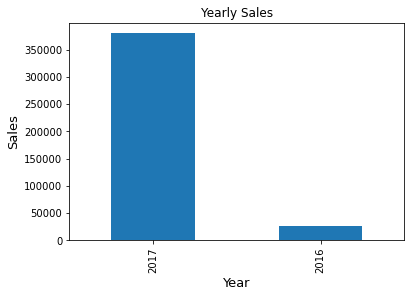

In [19]:
sales_year_count = ecom['Inv_Year'].value_counts()
sales_year_count.plot(kind='bar')
plt.title('Yearly Sales')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Sales',fontsize=13)

In [20]:
ecom.groupby(['Inv_Year','Inv_Month']).sum()['Total Price']

Inv_Year  Inv_Month
2016      11             91826.690
          12            462777.330
2017      1             517832.540
          2             434829.260
          3             562237.380
          4             409698.471
          5             684053.250
          6             576932.380
          7             602282.901
          8             643654.230
          9             875995.672
          10           1029836.220
          11           1153501.780
          12            254607.710
Name: Total Price, dtype: float64

In [21]:
sales_16 = ecom[ecom['Inv_Year'] == 2016]
sales_17 = ecom[ecom['Inv_Year'] == 2017]

Text(0.5, 1.0, 'Comparison of Total Price between years')

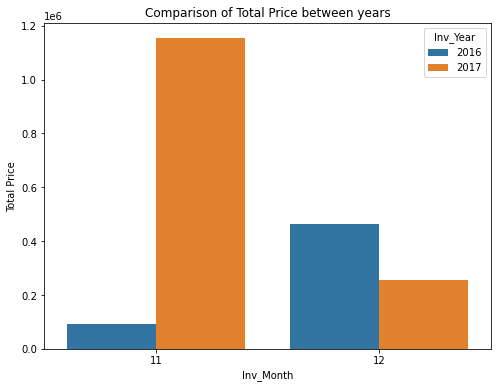

In [22]:
# Monthly sales for year 2016 & 2017
monthly_16 = sales_16.groupby('Inv_Month').sum()['Total Price']
monthly_17 = sales_17.groupby('Inv_Month').sum()['Total Price']
month_11_12 = ecom[(ecom['Inv_Month'] == 11) | (ecom['Inv_Month'] == 12)]
fig, ax = plt.subplots(figsize=(8,6))
comparison_tp = month_11_12.groupby(['Inv_Year','Inv_Month']).sum()['Total Price']
comparison_tp = comparison_tp.reset_index()
sns.barplot(data=comparison_tp, x='Inv_Month',y='Total Price',hue='Inv_Year')
plt.title('Comparison of Total Price between years')

Text(0.5, 1.0, 'Comparison of Quantity between years')

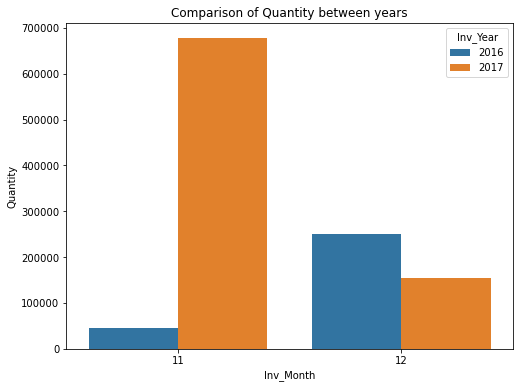

In [37]:
#monthly quantity comparison between 2016 & 2017
comparison_qty = month_11_12.groupby(['Inv_Year','Inv_Month']).sum()['Quantity']
comparison_qty = comparison_qty.reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=comparison_qty,x='Inv_Month',y='Quantity',hue='Inv_Year')
plt.title('Comparison of Quantity between years')

Text(0, 0.5, 'Quantity')

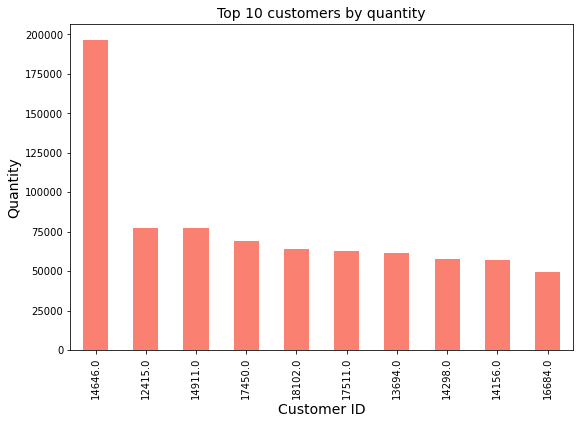

In [53]:
# Top 10 customers by quantity
qty_grp_by_cust = ecom.groupby('CustomerID').sum()['Quantity']
cust_top_10_qty = qty_grp_by_cust.sort_values(ascending=False).head(10)
plt.figure(figsize=(9,6))
cust_top_10_qty.plot(kind='bar',color='salmon')
plt.title('Top 10 customers by quantity',fontsize=14)
plt.xlabel('Customer ID',fontsize=14)
plt.ylabel('Quantity',fontsize=14)

<ipython-input-84-b5631313fc21>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=country_top_10['Country'],rotation=45)


Text(0, 0.5, '# of Customers')

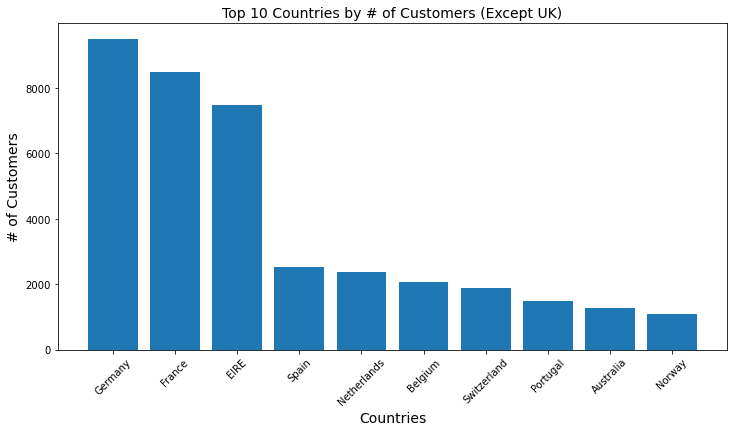

In [84]:
# Number of customers by Country except UK (only top 10)
group_by_country = ecom.groupby('Country').count()['CustomerID']
country_top_10 = group_by_country.sort_values(ascending=False).head(11)[1:]
country_top_10 = country_top_10.reset_index()

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(data=country_top_10,x='Country',height='CustomerID')
ax.set_title('Top 10 Countries by # of Customers (Except UK)',fontsize=14)
ax.set_xlabel('Countries',fontsize=14)
ax.set_xticklabels(labels=country_top_10['Country'],rotation=45)
ax.set_ylabel('# of Customers',fontsize=14)

In [101]:
# Try to group the customers by Mean, Sum and Max
cust_grp = ecom.groupby('CustomerID').agg({'Total Price': ['mean','sum','max']})
cust_grp_df = pd.DataFrame(cust_grp)
cust_grp_df.columns=['Mean','Sum','Max']

,Mean,Sum,Max
CustomerID,,,
12346.0,0.000000,0.00,77183.60
12347.0,23.681319,4310.00,249.60
12348.0,57.975484,1797.24,240.00
12349.0,24.076027,1757.55,300.00
12350.0,19.670588,334.40,40.00
...,...,...,...
18280.0,18.060000,180.60,23.70
18281.0,11.545714,80.82,16.95
18282.0,13.584615,176.60,25.50


# Feature Scaling

In [107]:
#Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_feat = scaler.fit_transform(cust_grp_df)
scaled_feat

array([[-2.26527040e-01, -2.31000989e-01,  2.67267079e+01],
       [-4.05130816e-02,  2.93431666e-01,  2.23608132e-02],
       [ 2.28863531e-01, -1.23162220e-02,  1.90285839e-02],
       ...,
       [-1.19821492e-01, -2.09512634e-01, -5.54259155e-02],
       [-2.04761121e-01,  2.39000508e-02, -5.70573194e-02],
       [-2.03610803e-02, -7.44423043e-03, -3.40788212e-02]])

In [108]:
# Convert to Dataframe for better view
scaled_feat_df = pd.DataFrame(scaled_feat,columns=['Mean','Sum','Max'])
scaled_feat_df

,Mean,Sum,Max
0,-0.226527,-0.231001,26.726708
1,-0.040513,0.293432,0.022361
2,0.228864,-0.012316,0.019029
3,-0.037413,-0.017146,0.039855
4,-0.072017,-0.190312,-0.050393
...,...,...,...
4367,-0.084668,-0.209026,-0.056051
4368,-0.135837,-0.221167,-0.058394
4369,-0.119821,-0.209513,-0.055426
4370,-0.204761,0.023900,-0.057057


Text(0, 0.5, 'WCSS')

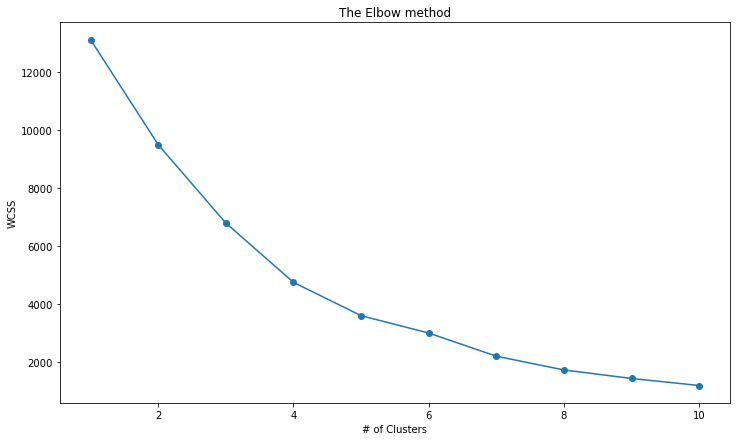

In [121]:
# Find the best number of clusters using Elbow method
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    clstr = KMeans(n_clusters=i)
    clstr.fit(scaled_feat)
    wcss.append(clstr.inertia_)

plt.figure(figsize=(12,7))
plt.plot(range(1,11),wcss,'-o')
plt.title('The Elbow method')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')

In [170]:
# Let us try with 4 clusters
clus_4 = KMeans(n_clusters=3)
clus_4_pred = clus_4.fit_predict(scaled_feat)

In [177]:
clus_4.cluster_centers_[:,0]

array([-0.00242116,  1.57298034, -0.22367965])

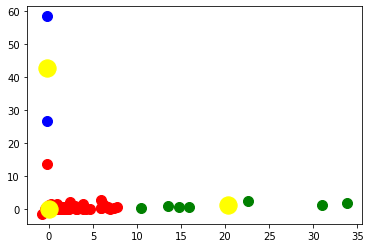

In [178]:
# plt.scatter(scaled_feat_df[clus_4_pred==0],s=100,c='red')
plt.scatter(x=scaled_feat_df[clus_4_pred==0]['Sum'],y=scaled_feat_df[clus_4_pred==0]['Max'],s=100,c='red')
plt.scatter(x=scaled_feat_df[clus_4_pred==1]['Sum'],y=scaled_feat_df[clus_4_pred==1]['Max'],s=100,c='green')
plt.scatter(x=scaled_feat_df[clus_4_pred==2]['Sum'],y=scaled_feat_df[clus_4_pred==2]['Max'],s=100,c='blue')
plt.scatter(x=clus_4.cluster_centers_[:,1],y=clus_4.cluster_centers_[:,2],s=300,c='yellow')